In [1]:
import analyze as az
import os
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import simulate
# import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

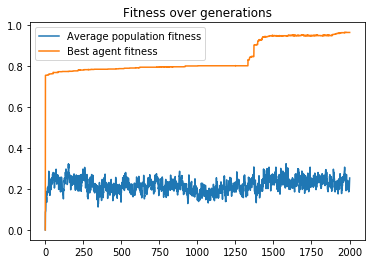

In [2]:
agent_directory = "Agents/joint/direct/random/914463"
gen_files = fnmatch.filter(os.listdir(agent_directory), 'gen*')
gen_numbers = [int(x[3:]) for x in gen_files]
last_gen = max(gen_numbers)
config = az.load_config(agent_directory)

az.plot_fitness(agent_directory)

In [3]:
def plot_data(trial_data, trial_num, to_plot, fig_title):
    if trial_num == "all":
        num_trials = len(trial_data['target_pos'])
        num_cols = num_trials/2

        if num_cols%2 != 0:
            num_cols += 1
            
        fig = plt.figure(figsize=(10, 6))
        fig.suptitle(fig_title)

        for p in range(num_trials):
            ax = fig.add_subplot(2, num_cols, p + 1)
            if to_plot == "behavior":
                ax.plot(trial_data['target_pos'][p], label='Target position')
                ax.plot(trial_data['tracker_pos'][p], label='Tracker position')
                ax.plot(trial_data['tracker_v'][p], label='Tracker velocity')
                ax.plot(trial_data['keypress'][p][:, 0], label='Left motor')
                ax.plot(trial_data['keypress'][p][:, 1], label='Right motor')
            elif to_plot == "activation_all":
                ax.plot(trial_data['brain_state_a1'][p][:, 0], label='n1')
                ax.plot(trial_data['brain_state_a1'][p][:, 1], label='n2')
                ax.plot(trial_data['brain_state_a1'][p][:, 2], label='n3')
                ax.plot(trial_data['brain_state_a1'][p][:, 3], label='n4')
                ax.plot(trial_data['brain_state_a1'][p][:, 4], label='n5')
                ax.plot(trial_data['brain_state_a1'][p][:, 5], label='n6')
                ax.plot(trial_data['brain_state_a1'][p][:, 6], label='n7')
                ax.plot(trial_data['brain_state_a1'][p][:, 7], label='n8')
            elif to_plot == "input_all":
                ax.plot(trial_data['input_a1'][p][:, 0], label='n1')
                ax.plot(trial_data['input_a1'][p][:, 1], label='n2')
                ax.plot(trial_data['input_a1'][p][:, 2], label='n3')
                ax.plot(trial_data['input_a1'][p][:, 3], label='n4')
                ax.plot(trial_data['input_a1'][p][:, 4], label='n5')
                ax.plot(trial_data['input_a1'][p][:, 5], label='n6')
                ax.plot(trial_data['input_a1'][p][:, 6], label='n7')
                ax.plot(trial_data['input_a1'][p][:, 7], label='n8')
            elif to_plot == "output_all":
                ax.plot(trial_data['output_a1'][p][:, 0], label='n7_a1')
                ax.plot(trial_data['output_a1'][p][:, 1], label='n8_a1', ls='--')
                ax.plot(trial_data['output_a2'][p][:, 0], label='n7_a2', ls='--')
                ax.plot(trial_data['output_a2'][p][:, 1], label='n8_a2')

    else:
        if to_plot == "behavior":
            plt.plot(trial_data['target_pos'][trial_num], label='Target position')
            plt.plot(trial_data['tracker_pos'][trial_num], label='Tracker position')
            plt.plot(trial_data['tracker_v'][trial_num], label='Tracker velocity')
            plt.plot(trial_data['keypress'][trial_num][:, 0], label='Left motor')
            plt.plot(trial_data['keypress'][trial_num][:, 1], label='Right motor')
        elif to_plot == "activation_all":
            plt.plot(trial_data['brain_state'][trial_num][:, 0], label='n1')
            plt.plot(trial_data['brain_state'][trial_num][:, 1], label='n2')
            plt.plot(trial_data['brain_state'][trial_num][:, 2], label='n3')
            plt.plot(trial_data['brain_state'][trial_num][:, 3], label='n4')
            plt.plot(trial_data['brain_state'][trial_num][:, 4], label='n5')
            plt.plot(trial_data['brain_state'][trial_num][:, 5], label='n6')
            plt.plot(trial_data['brain_state'][trial_num][:, 6], label='n7')
            plt.plot(trial_data['brain_state'][trial_num][:, 7], label='n8')
        elif to_plot == "input_all":
            plt.plot(trial_data['input'][trial_num][:, 0], label='n1')
            plt.plot(trial_data['input'][trial_num][:, 1], label='n2')
            plt.plot(trial_data['input'][trial_num][:, 2], label='n3')
            plt.plot(trial_data['input'][trial_num][:, 3], label='n4')
            plt.plot(trial_data['input'][trial_num][:, 4], label='n5')
            plt.plot(trial_data['input'][trial_num][:, 5], label='n6')
            plt.plot(trial_data['input'][trial_num][:, 6], label='n7')
            plt.plot(trial_data['input'][trial_num][:, 7], label='n8')
        elif to_plot == "output_all":
            plt.plot(trial_data['output'][trial_num][:, 0], label='n7')
            plt.plot(trial_data['output'][trial_num][:, 1], label='n8')

    plt.legend()
    plt.show()

In [5]:
td, ag1, ag2 = az.run_best_pair(agent_directory, last_gen)
td_left = az.run_agent_from_best_pair(agent_directory, last_gen, 'left')
td_right = az.run_agent_from_best_pair(agent_directory, last_gen, 'right')

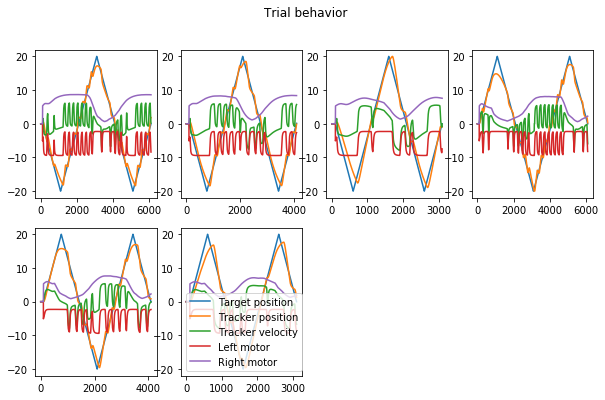

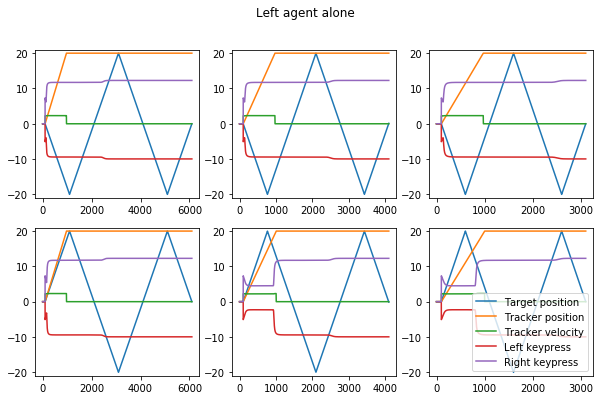

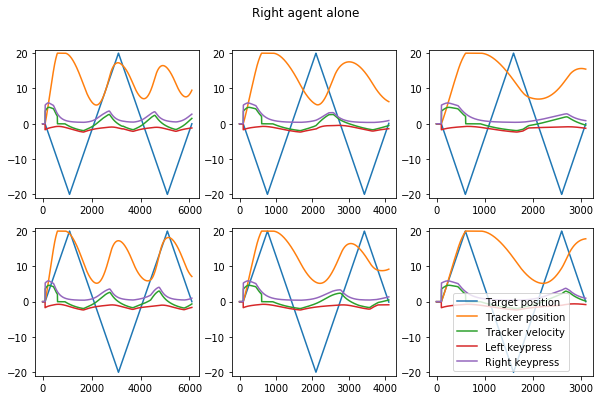

In [5]:
lims = [config['evaluation_params']['screen_width'][0]-1, config['evaluation_params']['screen_width'][1]+1]
plot_data(td, "all", "behavior", "Trial behavior")
az.plot_data(td_left, "all", "Left agent alone", lims)
az.plot_data(td_right, "all", "Right agent alone", lims)

We see that the agents are able to accomplish the tracking task. Furthermore, the tracker movement is produced by a joint contribution of the agents, where one agent produces a fast oscillating motor output and another agent a slower oscillation. Running iehter agent alone on the task does not produce a successful tracking behavior.

In order to make sure that the agents did not evolve just a way to deal with situations from the set they were optimized on, we run a set of new generalization trials. In the first generalization test we probe whether agents are able to deal with new impact values - how much velocity is added based on motor output. In the second generalization test we let the target start its movement not from 0 but a random starting position between -3 and 3.

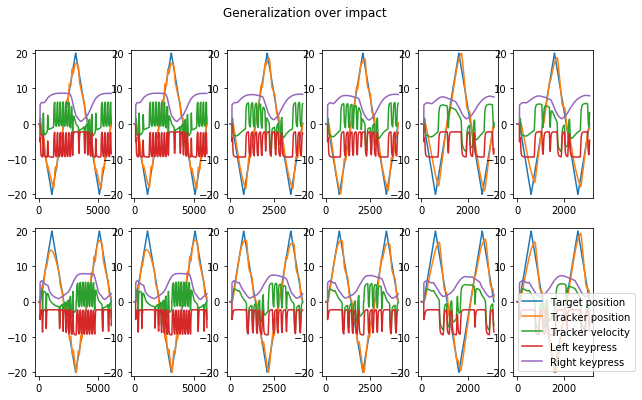

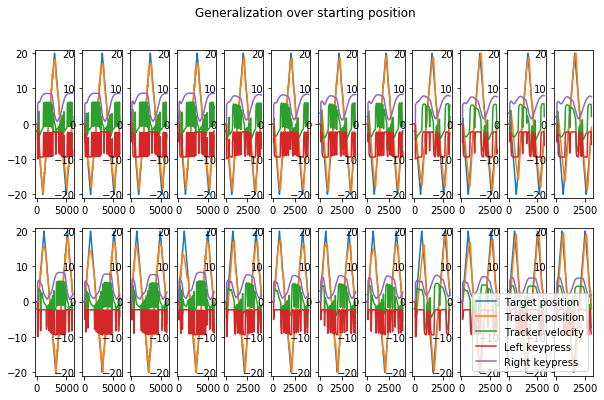

In [14]:
az.check_joint_generalization(agent_directory, ag1, ag2)

The generalization test reveals that the agents are able to produce adequate behavior even in conditions they weren't specifically trained on during evolution.

The questions that need to be addressed are as follows:

1. Are the agents using perceptual input in producing their behavior? More specifically:
 - are they using visual perception of the distance to the target?
 - are they using visual perception of the distance to the environment borders?
 - are they using auditory information about each other's motor output?

2. How is perceptual input used to produce coordinated motor output?
 - how does raw input to each of the sensory neurons compare to their outputs?
 - how does neuronal activation relate to the target-tracker distance?
 - is this relationship different depending on the target's position in relation to the borders?

3. What can be said about coordination between the agents?
 - how does activation of one of the tracker's motor outputs influence the activation of the other (e.g. if one agent was pushing the tracker into one direction uncontrollably, is there a compensating response from the other)?
 - is there any correlation between the neuronal activity of the two agents?

We will answer the first question by lesion studies, the second - by plotting dynamics and the third by looking at mutual information between the two agent variables.

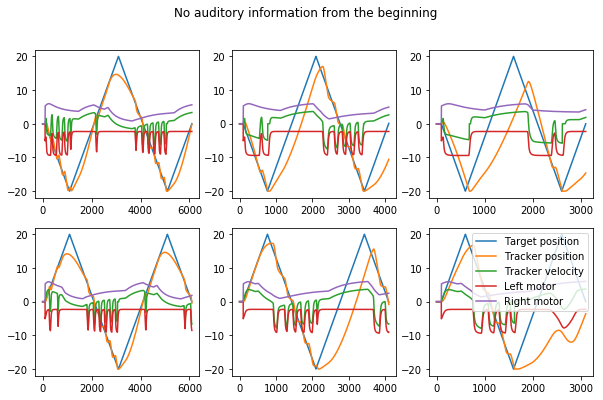

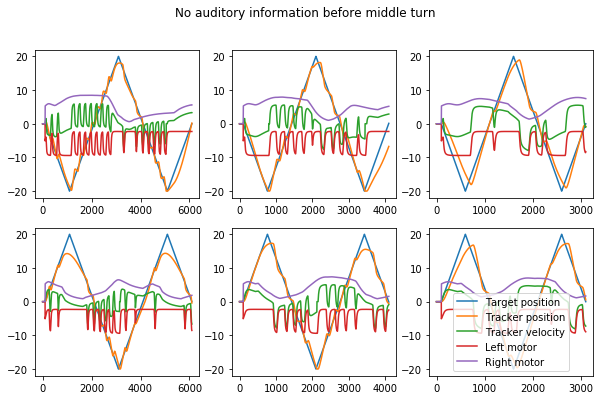

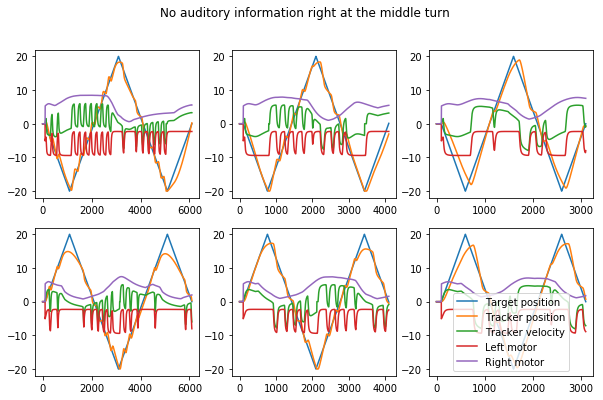

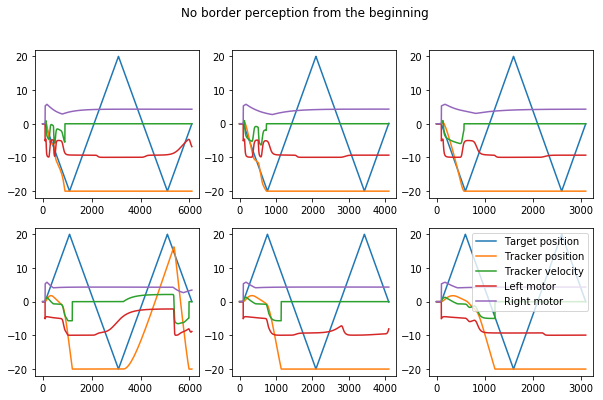

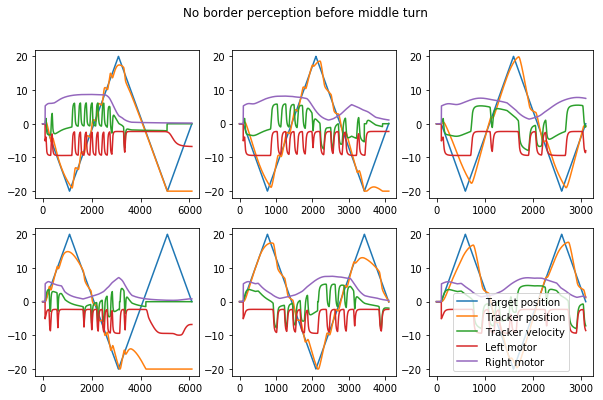

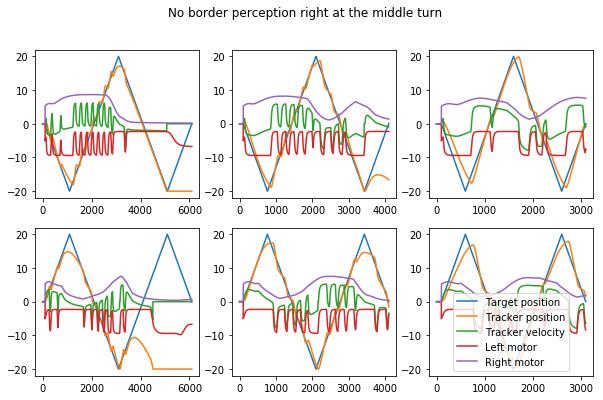

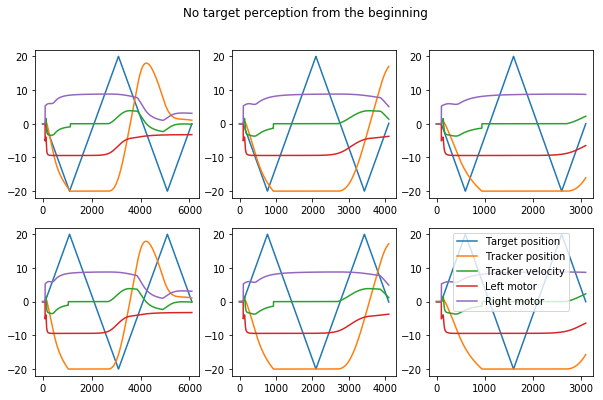

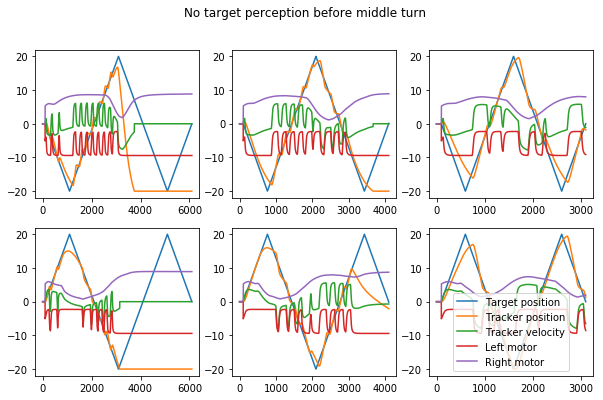

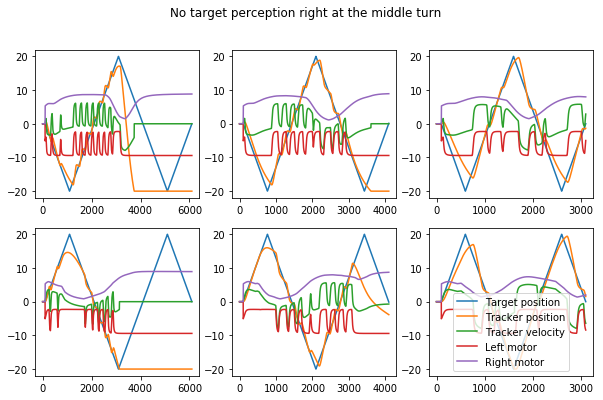

In [15]:
lesion_test = simulate.LesionedSimulation(config['network_params']['step_size'], config['evaluation_params'])
td_deaf_start = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "start", "auditory", savedata=True)
td_deaf_before_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "before_midturn",
                                                   "auditory", savedata=True)
td_deaf_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "midturn", "auditory", savedata=True)
plot_data(td_deaf_start, "all", "behavior", "No auditory information from the beginning")
plot_data(td_deaf_before_half, "all", "behavior", "No auditory information before middle turn")
plot_data(td_deaf_half, "all", "behavior", "No auditory information right at the middle turn")

td_borderblind_start = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "start",
                                                    "visual_border", savedata=True)
td_borderblind_before_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "before_midturn",
                                                          "visual_border", savedata=True)
td_borderblind_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "midturn",
                                                   "visual_border", savedata=True)
plot_data(td_borderblind_start, "all", "behavior", "No border perception from the beginning")
plot_data(td_borderblind_before_half, "all", "behavior", "No border perception before middle turn")
plot_data(td_borderblind_half, "all", "behavior", "No border perception right at the middle turn")


td_targetblind_start = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "start",
                                                    "visual_target", savedata=True)
td_targetblind_before_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "before_midturn",
                                                          "visual_target", savedata=True)
td_targetblind_half = lesion_test.run_joint_trials(ag1, ag2, lesion_test.trials, "midturn",
                                                   "visual_target", savedata=True)
plot_data(td_targetblind_start, "all", "behavior", "No target perception from the beginning")
plot_data(td_targetblind_before_half, "all", "behavior", "No target perception before middle turn")
plot_data(td_targetblind_half, "all", "behavior", "No target perception right at the middle turn")

From the lesion studies we can observe that auditory perception does not seem to be critical to the performance in this task. Even if there is no possibility to hear the co-actor's action, coordination can proceed. We do notice that performance precision begins to deteriorate at the end of the trial run suggesting that perhaps were the trial to continue it would deteriorate even further.
Visual perception, on the other hand, does seem critical in terms of both perception of the border and the target. If either is removed from the beginning of the trial, performance is severely disrupted. If border input is removed around the middle of the trial, the agents can complete half of the trials but fail to execute a follow-up turn in the other half. Such delayed loss of target information is slightly more detrimental - soon after the input is removed one of the agents stops its oscillations leading the tracker off course. Interestingly, in the faster trial (rightmost column), it is easier to maintain the correct behavior. 

In order to better understand the way the agents accomplish the task, we can take a closer look at the behavioral tendencies of the tracker when the movement (and thus, continuous change of the situation) is taken out of the picture. We do so by running a modified simulation in which the target remains immobile and the tracker can activate its motors but its position remains unchanged. We let such a situation evolve over a number of timesteps and then plot a velocity phase portrait, i.e. the tracker velocities at the end of the simulation at various points. The resulting picture is a grid of a range of possible combinations between tracker and target positions.

In [5]:
# td_steady = az.run_best_pair_steady(agent_directory, ag1, ag2)
td_steady = az.run_best_pair_really_steady(agent_directory, ag1, ag2)

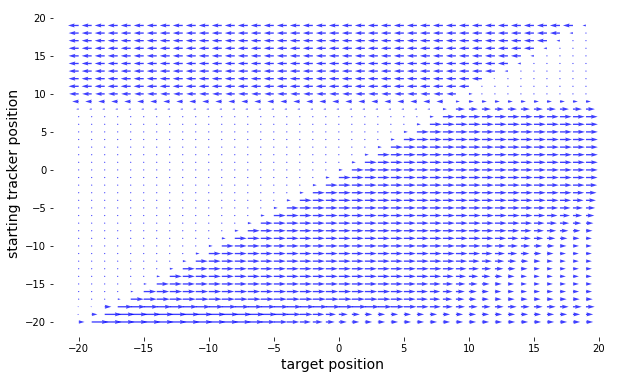

In [12]:
positions = list(range(-20, 20))
# Define the sample space (plotting ranges)
ymin = min(positions)
ymax = max(positions)
num_points = len(positions)
# Define plotting grid
y1 = np.linspace(ymin, ymax, num_points)
y2 = np.linspace(ymin, ymax, num_points)
Y1, Y2 = np.meshgrid(y1, y2)

changes_y1 = np.zeros((num_points, num_points))
# fetch the velocities
for i in range(len(positions)):
    for j in range(len(positions)):
        changes_y1[i, j] = td_steady[str(positions[i])]['tracker_v'][j][-1]

changes_y2 = np.zeros((num_points, num_points))

# Plot the phase portrait
# quiver function takes the grid of x-y coordinates and their derivatives
plt.figure(figsize=(10, 6))
plt.quiver(Y1, Y2, changes_y1, changes_y2, color='b', alpha=.75)
plt.box('off')
plt.xlabel('target position', fontsize=14)
plt.ylabel('starting tracker position', fontsize=14)
plt.show()

The arrows indicate the direction and the magnitude of horizontal velocity of the tracker (that is a sum of its left and right motor activation provided by the two agents) at the end of this simulation. An arrow pointing to the right means that the tracker's velocity is positive and therefore it is trying to move right. An arrow pointing to the left means it's trying to move left. To better understand what this means, we can visualize a few of these tracker-target position combinations in how the velocity unfolds over time.

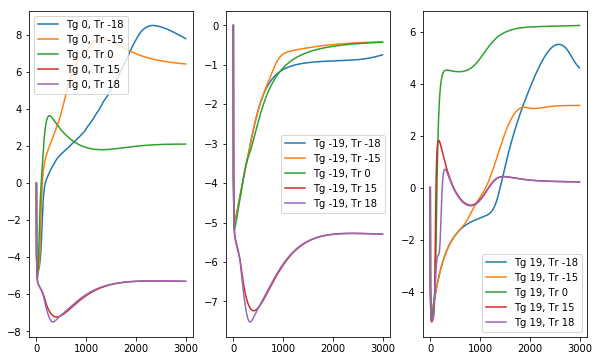

In [21]:
target_pos_dict = {}
for i in range(len(positions)):
    target_pos_dict[positions[i]] = i

# def plot_steady_vels(target_pos, tracker_pos):
#     plt.plot(td_steady[str(tracker_pos)]['tracker_v'][target_pos_dict[target_pos]],
#             label='Tg {}, Tr {}'.format(target_pos, tracker_pos))
# plot_steady_vels(0, -15)

fig = plt.figure(figsize=(10, 6))
targets = [0, -19, 19]
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot(td_steady[str(-18)]['tracker_v'][target_pos_dict[targets[i]]],
                label='Tg {}, Tr {}'.format(targets[i], -18))
    ax.plot(td_steady[str(-15)]['tracker_v'][target_pos_dict[targets[i]]],
                label='Tg {}, Tr {}'.format(targets[i], -15))
    ax.plot(td_steady[str(0)]['tracker_v'][target_pos_dict[targets[i]]],
                label='Tg {}, Tr {}'.format(targets[i], 0))
    ax.plot(td_steady[str(15)]['tracker_v'][target_pos_dict[targets[i]]],
                label='Tg {}, Tr {}'.format(targets[i], 15))
    ax.plot(td_steady[str(18)]['tracker_v'][target_pos_dict[targets[i]]],
                label='Tg {}, Tr {}'.format(targets[i], 18))
    plt.legend()

In [32]:
print(td_steady["15"]['tracker_v'][39][-1])
print(td_steady["18"]['tracker_v'][39][-1])
print(td_steady["19"]['tracker_v'][39][-1])

[0.21474418]
[0.21397241]
[-1.82740599]


When the target is positioned in the middle of the screen (position=0) and the tracker is placed to the left of it (at -15 or -18), its tendency would be to adopt a highly positive velocity that would move it to the right (towards the target). If it's placed to the right (15, 18), its tendecy would be to move to the left. When both are at location 0, the tendency is still to adopt a positive velocity rather than 0. This might not seem adaptive but it is consistent with an oscillatory strategy adopted by the tracker. It never stays right on top of the target motionless but rather overshoots and undershoots it repeatedly.

When the target is close to the left border (at -19), the tracker tries to move left (towards the border) with a much greater velocity if it is positioned far on the right (at 15 or 18) than if it's close to the left border or in the center. The relationship is however not linear since the magnitude of velocity is very similar in the case of tracker being in the center or close to the border even though the center is still some time away from the border.

When the target is close to the right border (at 19), the tracker tries to move right if it's placed close to the left border (-18, -15) or in the center (at 0) but its velocity is close to 0 (it's 0.21) when placed close to the border (15 or 18) and in fact becomes negative at position 19.

The asymmetry visible in the phase plot and these patterns of slightly different tendencies adopted by the tracker close to left vs right border might explain the different behaviors close to those borders. Namely, it appears that close the left border the tracker follows the target very closely or is slightly delayed, it reaches the border and then turns back. Close to the right border, on the other hand, the tracker starts turning already before reaching it. This strategy is reminicsent of the strategy adopted by human participants, even thought the way the tracker is controlled is different in our case and it can in principle follow the target until the very border.

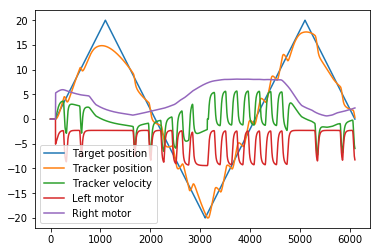

In [33]:
plot_data(td, 3, "behavior", "Trial behavior")

Now, we would like to understand how the overall tracker velocity results from the motor output of the two agents. From the plot above it appears that rather than adopting a division of labor in which one agent controlls movement to the left and the other to the right, the division is more along the lines of controlling the fast oscillations around the target position and slow oscillations as the target moves in between the two borders.

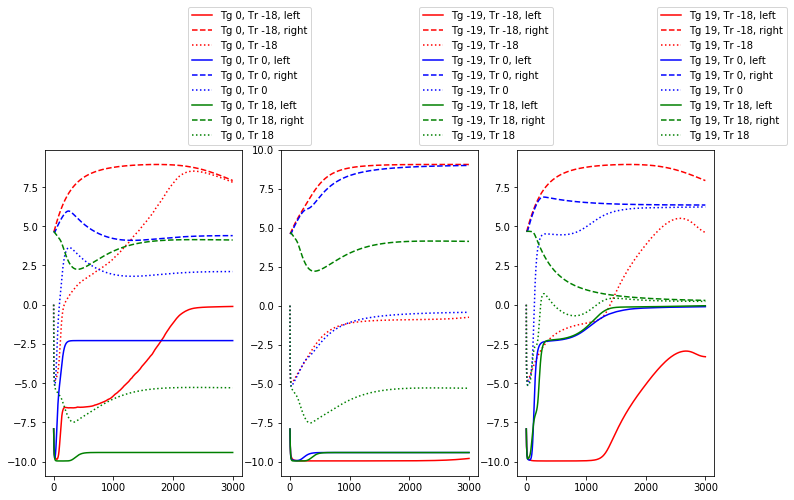

In [51]:
fig = plt.figure(figsize=(12, 6))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot(td_steady[str(-18)]['keypress'][target_pos_dict[targets[i]]][:, 0], 'r',
                label='Tg {}, Tr {}, left'.format(targets[i], -18))
    ax.plot(td_steady[str(-18)]['keypress'][target_pos_dict[targets[i]]][:, 1], 'r--',
                label='Tg {}, Tr {}, right'.format(targets[i], -18))
    ax.plot(td_steady[str(-18)]['tracker_v'][target_pos_dict[targets[i]]], 'r:',
                label='Tg {}, Tr {}'.format(targets[i], -18))

    ax.plot(td_steady[str(0)]['keypress'][target_pos_dict[targets[i]]][:, 0],'b',
                label='Tg {}, Tr {}, left'.format(targets[i], 0))
    ax.plot(td_steady[str(0)]['keypress'][target_pos_dict[targets[i]]][:, 1],'b--',
                label='Tg {}, Tr {}, right'.format(targets[i], 0))
    ax.plot(td_steady[str(0)]['tracker_v'][target_pos_dict[targets[i]]], 'b:',
            label='Tg {}, Tr {}'.format(targets[i], 0))

    ax.plot(td_steady[str(18)]['keypress'][target_pos_dict[targets[i]]][:, 0],'g',
                label='Tg {}, Tr {}, left'.format(targets[i], 18))
    ax.plot(td_steady[str(18)]['keypress'][target_pos_dict[targets[i]]][:, 1],'g--',
                label='Tg {}, Tr {}, right'.format(targets[i], 18))
    ax.plot(td_steady[str(18)]['tracker_v'][target_pos_dict[targets[i]]],'g:',
                label='Tg {}, Tr {}'.format(targets[i], 18))

    ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

The simulation was set up in such a way that the left motor can only output negative values while the right motor positive ones. This was to prevent the possibility that one agent could accomplish the task on its own. This, however, still leaves open the magnitude of motor activation and their coordination.

From these plots we can see that the high rightward velocity (red dotted line in figure 1 and 3, blue dotted line in figure 3) is a product of high activation of the right motor with a very low activation of the left one. The close to 0 velocity in figure 2 (red and blue dotted lines) is a result of nearly maximum activation of both motors. This happens when target and tracker are close to the left border or target close to the left border while tracker in the center. The high leftward velocity (green dotted lines in figure 1 and 2) is a result of low activation of the right motor with a maximal activation of left. Finally, the close to 0 velocity in figure 3 (target close to right border) is due to both motors being nearly disactivated.

It is logical that since the overall velocity is a sum of both motor outputs, it is minimized by either both motors being highly active or both being being close to inactive. It appears that the agent adopt these two strategies in different situations - the latter when the target and tracker are close to the right border, the former when they are both close to the left border.

Finally, the motor output is a result primarily of the two neurons that are connected to the motors with motor weights - neuron 7 and 8 in both agents. We can examine their output profiles in situations of interest.

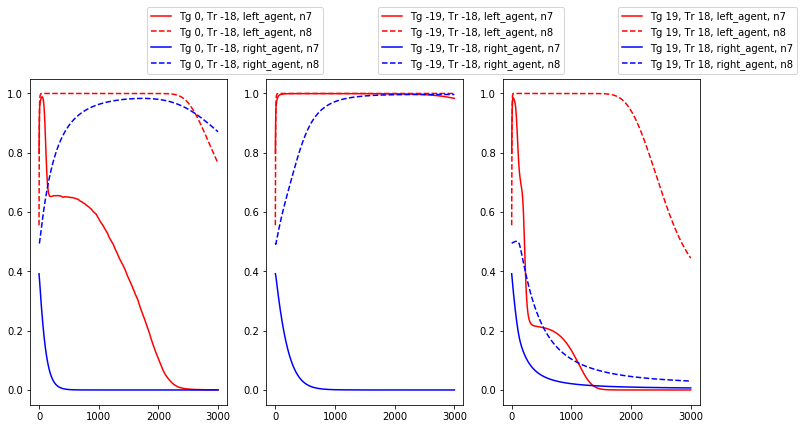

In [57]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 3, 1)
ax.plot(td_steady[str(-18)]['output_a1'][target_pos_dict[0]][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(0, -18))
ax.plot(td_steady[str(-18)]['output_a1'][target_pos_dict[0]][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(0, -18))
ax.plot(td_steady[str(-18)]['output_a2'][target_pos_dict[0]][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(0, -18))
ax.plot(td_steady[str(-18)]['output_a2'][target_pos_dict[0]][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(0, -18))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

ax = fig.add_subplot(1, 3, 2)
ax.plot(td_steady[str(-18)]['output_a1'][target_pos_dict[-19]][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(-19, -18))
ax.plot(td_steady[str(-18)]['output_a1'][target_pos_dict[-19]][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(-19, -18))
ax.plot(td_steady[str(-18)]['output_a2'][target_pos_dict[-19]][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(-19, -18))
ax.plot(td_steady[str(-18)]['output_a2'][target_pos_dict[-19]][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(-19, -18))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

ax = fig.add_subplot(1, 3, 3)
ax.plot(td_steady[str(18)]['output_a1'][target_pos_dict[19]][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(19, 18))
ax.plot(td_steady[str(18)]['output_a1'][target_pos_dict[19]][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(19, 18))
ax.plot(td_steady[str(18)]['output_a2'][target_pos_dict[19]][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(19, 18))
ax.plot(td_steady[str(18)]['output_a2'][target_pos_dict[19]][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(19, 18))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

The first figure displays the case in which target is at 0 while tracker close to left border and ends up moving quickly to the right. The neuronal output shows a high output of neuron 8 of both agents and 0 output of their neuron 7.

The second figure is the case in which both target and tracker are close to the left border with tracker having a low leftward velocity due to high output of both motors. The only non-active neuron is n7 of the right agent.

The third figure is the case in which both target and tracker are close to the right border with tracker having a very low rightward velocity due to near disactivation of both motors. Here the only active neuron is n8 of the left agent (but with a falling tendency).

Naturally, the plots above show a tendency of the agents if they are held in a certain situation with target holding its position and the tracker not able to move. In a real trial, however, the situation keeps changing due to both of them moving between the two borders. In order to understand how the actual behavior is produced, we will first examine the situation of a moving tracker with an immobile target. The plot below displays tracker behavior (as target-tracker distance) when it starts from the middle of the screen and observes an immobile object at different starting positions.

In [5]:
td_immobile = az.run_best_pair_simple(agent_directory, ag1, ag2)
# plot_data(td_immobile, "all", "behavior", "Trial behavior")

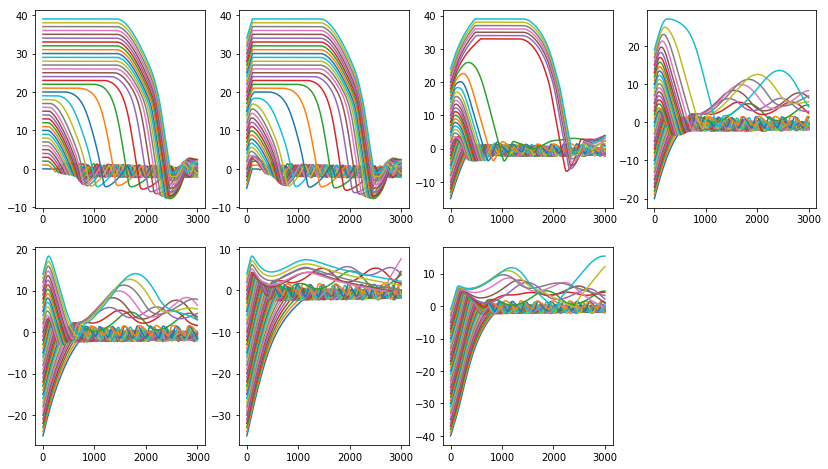

In [7]:
num_trials = len(td_immobile[0]['target_pos'])
selected_positions = [-20, -15, -5, 0, 5, 15, 20]

fig = plt.figure(figsize=(14, 8))
for i in range(len(selected_positions)):
    ax = fig.add_subplot(2, 4, i+1)
    for trial_num in range(num_trials-1):
        plt.plot(td_immobile[selected_positions[i]]['target_pos'][trial_num] - 
                 td_immobile[selected_positions[i]]['tracker_pos'][trial_num])

We see that when the tracker starts from the left side of the screen, it is able to approach the target successfully and stay close to it in all cases. When it starts from the middle or right side of the screen it has some difficulty. We can examine how both successful and unsuccessful tracking is accomplished. First, let's focus on the case in which the tracker starts from the middle and plot only a few cases.

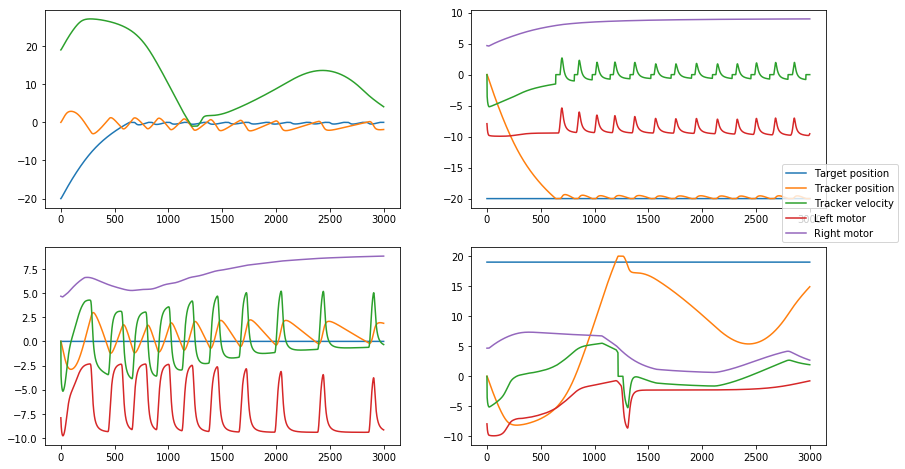

In [23]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(2, 2, 1)
ax.plot(td_immobile[0]['target_pos'][0] - td_immobile[0]['tracker_pos'][0])
ax.plot(td_immobile[0]['target_pos'][20] - td_immobile[0]['tracker_pos'][20])
ax.plot(td_immobile[0]['target_pos'][39] - td_immobile[0]['tracker_pos'][39])
ax = fig.add_subplot(2, 2, 2)
ax.plot(td_immobile[0]['target_pos'][0], label='Target position')
ax.plot(td_immobile[0]['tracker_pos'][0], label='Tracker position')
ax.plot(td_immobile[0]['tracker_v'][0], label='Tracker velocity')
ax.plot(td_immobile[0]['keypress'][0][:, 0], label='Left motor')
ax.plot(td_immobile[0]['keypress'][0][:, 1], label='Right motor')
ax = fig.add_subplot(2, 2, 3)
ax.plot(td_immobile[0]['target_pos'][20], label='Target position')
ax.plot(td_immobile[0]['tracker_pos'][20], label='Tracker position')
ax.plot(td_immobile[0]['tracker_v'][20], label='Tracker velocity')
ax.plot(td_immobile[0]['keypress'][20][:, 0], label='Left motor')
ax.plot(td_immobile[0]['keypress'][20][:, 1], label='Right motor')
ax = fig.add_subplot(2, 2, 4)
ax.plot(td_immobile[0]['target_pos'][39], label='Target position')
ax.plot(td_immobile[0]['tracker_pos'][39], label='Tracker position')
ax.plot(td_immobile[0]['tracker_v'][39], label='Tracker velocity')
ax.plot(td_immobile[0]['keypress'][39][:, 0], label='Left motor')
ax.plot(td_immobile[0]['keypress'][39][:, 1], label='Right motor')
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

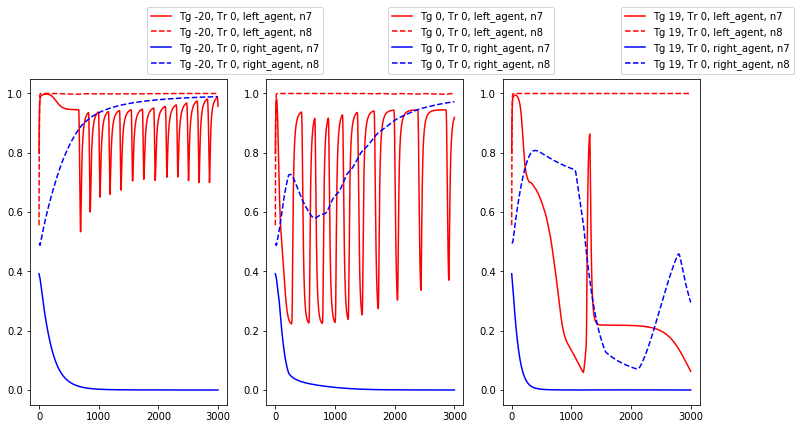

In [24]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 3, 1)
ax.plot(td_immobile[0]['output_a1'][0][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(-20, 0))
ax.plot(td_immobile[0]['output_a1'][0][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(-20, 0))
ax.plot(td_immobile[0]['output_a2'][0][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(-20, 0))
ax.plot(td_immobile[0]['output_a2'][0][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(-20, 0))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

ax = fig.add_subplot(1, 3, 2)
ax.plot(td_immobile[0]['output_a1'][20][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(0, 0))
ax.plot(td_immobile[0]['output_a1'][20][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(0, 0))
ax.plot(td_immobile[0]['output_a2'][20][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(0, 0))
ax.plot(td_immobile[0]['output_a2'][20][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(0, 0))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

ax = fig.add_subplot(1, 3, 3)
ax.plot(td_immobile[0]['output_a1'][39][:, 6], 'r',
            label='Tg {}, Tr {}, left_agent, n7'.format(19, 0))
ax.plot(td_immobile[0]['output_a1'][39][:, 7], 'r--',
            label='Tg {}, Tr {}, left_agent, n8'.format(19, 0))
ax.plot(td_immobile[0]['output_a2'][39][:, 6], 'b',
            label='Tg {}, Tr {}, right_agent, n7'.format(19, 0))
ax.plot(td_immobile[0]['output_a2'][39][:, 7], 'b--',
            label='Tg {}, Tr {}, right_agent, n8'.format(19, 0))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower center")

In this case we see that neural output of the right agent's neuron 7 is always 0. Its neuron 8 is firing in the successful cases but switches off in the unsuccessful trial. Since that trial requires the tracker to move to the right border and the right agent is not creating almost any output, the result is not surprising. The left agent's neuron 8 is always active independently of the situation. Its neuron 7, on the other hand is creating oscillations in successful trials, allowing the tracker to oscillate around the target. In the unsuccessful trial also that neuron switches off. That is, since the target is not at all reached, no oscillations around it are created.

Both our looks at the motor neurons of the two agents suggest that the agent responsible for leftward velocity is primarily using neuron 7, while the right agent is primarily using neuron 8. We can add to this a look at the motor weights of the two agents.

In [25]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix.
    Positive and negative values are represented by white and black squares, respectively,
    and the size of each square represents the magnitude of each value.
    """
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    if matrix.ndim == 2:
        for (x, y), w in np.ndenumerate(matrix):
            color = 'white' if w > 0 else 'black'
            size = np.sqrt(np.abs(w) / max_weight)
            rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                                 facecolor=color, edgecolor=color)
            ax.add_patch(rect)
    else:
        for (x), w in np.ndenumerate(matrix):
            color = 'white' if w > 0 else 'black'
            size = np.sqrt(np.abs(w) / max_weight)
            rect = plt.Rectangle([x - size / 2, 1], size, size,
                                 facecolor=color, edgecolor=color)
            ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

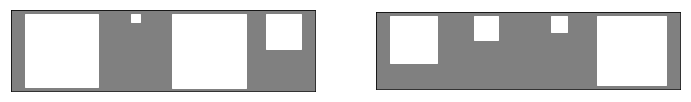

In [28]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
hinton(ag1.MW, max_weight=10)
ax = fig.add_subplot(1, 2, 2)
hinton(ag2.MW, max_weight=10)

Motor weights can only be positive. Weights 1 and 2 go from neuron 7 to left and right motor. Weights 3 and 4 from neuron 8 to left and right motor. Since the left agent can only use his left motor while the right agent can only use the right, it makes sense that the strongest weights for the left agent are weight 1 and 3 that go to the left motor. The strongest weight in the right agent is the weight number 4 that connects its crucial neuron 8 with the right motor.

[ -22.87182046   67.97412979 -100.           56.69813314]


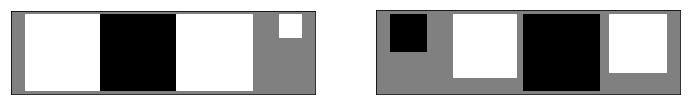

In [32]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
hinton(ag1.VW, max_weight=100)
ax = fig.add_subplot(1, 2, 2)
hinton(ag2.VW, max_weight=100)
print(ag2.VW)

Left agent has maximum weights for left border perception and left-eye distance to the target and minimum (most negative) for right border perception. Right agent has the most negative weight for left-eye distance to the target and moderately strong positive weights for right border and right-eye distance to the target.

In [70]:
def plot_visual_outputs_border(trial_data):
    num_trials = len(trial_data['target_pos'])
    num_cols = num_trials/2
    fig = plt.figure(figsize=(14, 8))

    for p in range(num_trials):
        ax = fig.add_subplot(2, num_cols, p + 1)
        ax.plot(trial_data['output_a1'][p][:, 0], label='n1')
        ax.plot(trial_data['output_a1'][p][:, 1], label='n2')
#         ax.plot(trial_data['output_a1'][p][:, 2], label='n3')
#         ax.plot(trial_data['output_a1'][p][:, 3], label='n4')
        ax.plot(trial_data['output_a2'][p][:, 0], label='n1', ls='--')
        ax.plot(trial_data['output_a2'][p][:, 1], label='n2', ls='--')
#         ax.plot(trial_data['output_a2'][p][:, 2], label='n3', ls='--')
#         ax.plot(trial_data['output_a2'][p][:, 3], label='n4', ls='--')

    plt.legend(bbox_to_anchor=(1.04,1), loc="lower center")
    plt.show()

def plot_visual_outputs_target(trial_data):
    num_trials = len(trial_data['target_pos'])
    num_cols = num_trials/2
    fig = plt.figure(figsize=(14, 8))

    for p in range(num_trials):
        ax = fig.add_subplot(2, num_cols, p + 1)
        ax.plot(trial_data['output_a1'][p][:, 2], label='n3')
        ax.plot(trial_data['output_a1'][p][:, 3], label='n4')
        ax.plot(trial_data['output_a2'][p][:, 2], label='n3', ls='--')
        ax.plot(trial_data['output_a2'][p][:, 3], label='n4', ls='--')

    plt.legend(bbox_to_anchor=(1.04,1), loc="lower center")
    plt.show()

def plot_audio_outputs(trial_data):
    num_trials = len(trial_data['target_pos'])
    num_cols = num_trials/2
    fig = plt.figure(figsize=(14, 8))

    for p in range(num_trials):
        ax = fig.add_subplot(2, num_cols, p + 1)
        ax.plot(trial_data['output_a1'][p][:, 4], label='n5')
        ax.plot(trial_data['output_a1'][p][:, 5], label='n6')
        ax.plot(trial_data['output_a2'][p][:, 4], label='n5', ls='--')
        ax.plot(trial_data['output_a2'][p][:, 5], label='n6', ls='--')

    plt.legend(bbox_to_anchor=(1.04,1), loc="lower center")
    plt.show()
    
def plot_motor_outputs(trial_data):
    num_trials = len(trial_data['target_pos'])
    num_cols = num_trials/2
    fig = plt.figure(figsize=(14, 8))

    for p in range(num_trials):
        ax = fig.add_subplot(2, num_cols, p + 1)
        ax.plot(trial_data['output_a1'][p][:, 6], label='n7')
        ax.plot(trial_data['output_a1'][p][:, 7], label='n8')
        ax.plot(trial_data['output_a2'][p][:, 6], label='n7', ls='--')
        ax.plot(trial_data['output_a2'][p][:, 7], label='n8', ls='--')

    plt.legend(bbox_to_anchor=(1.04,1), loc="lower center")
    plt.show()

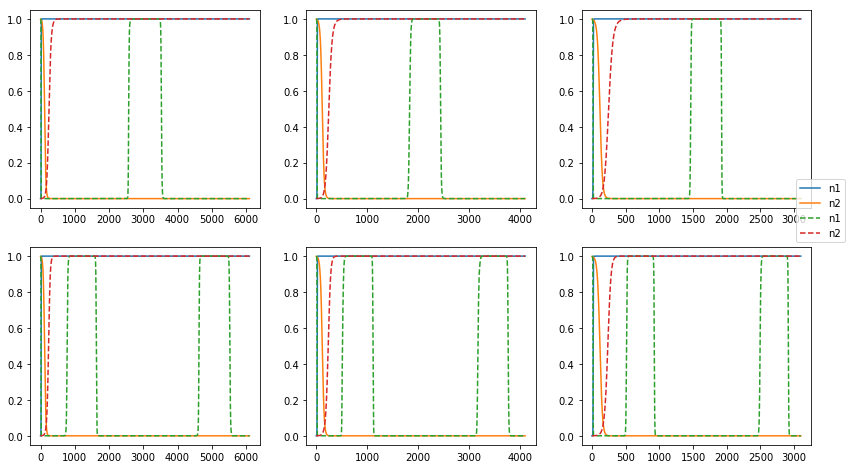

In [59]:
plot_visual_outputs_border(td)

The only neuron that is not continuosly on or off is neuron 1 of the right agent (connected to the input from the distance to the left border) whose maximum output corresponds to reaching the right border (being maximally distant to the left border).

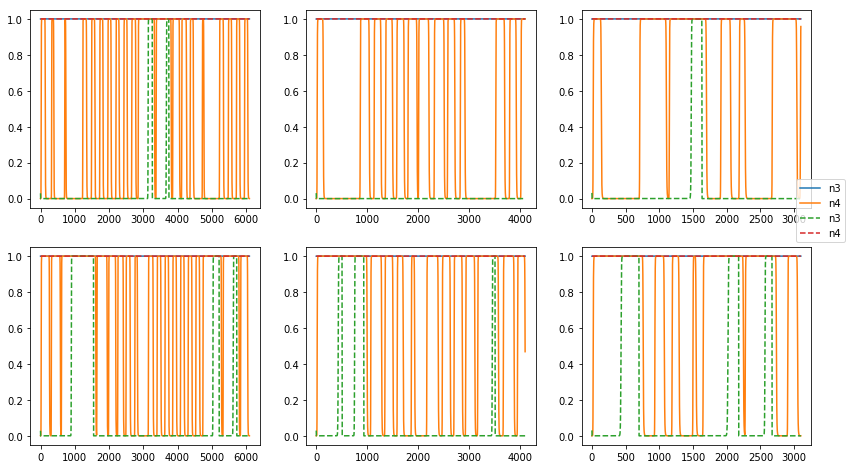

In [64]:
plot_visual_outputs_target(td)

The neurons 3 of the left agent and 4 of the right are constantly giving maximum output and those are the neurons responsible for distance perception of the target with the left and right eye respectively. Neurons 4 of the left and 3 of the right fire intermittently.

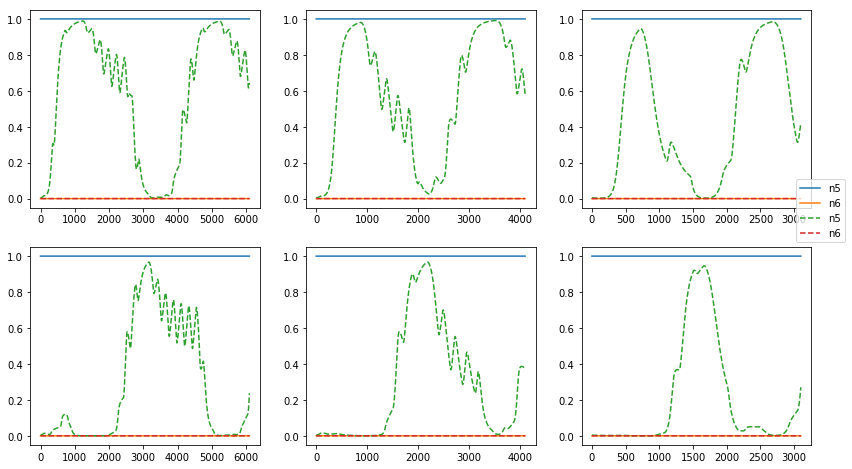

In [40]:
plot_audio_outputs(td)

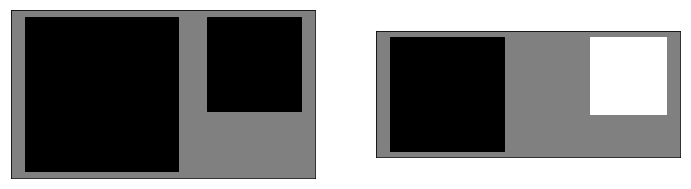

In [41]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
hinton(ag1.AW, max_weight=100)
ax = fig.add_subplot(1, 2, 2)
hinton(ag2.AW, max_weight=100)

Audio and visual weights have range between -100 and 100. The left agent's strongest audio weight is from the left ear and is negative. The right agent has two moderately strong weights from both ears, negative left and positive right. However, the only output that varies across the trial is neuron 5 (connected to the left year) in the right agent.

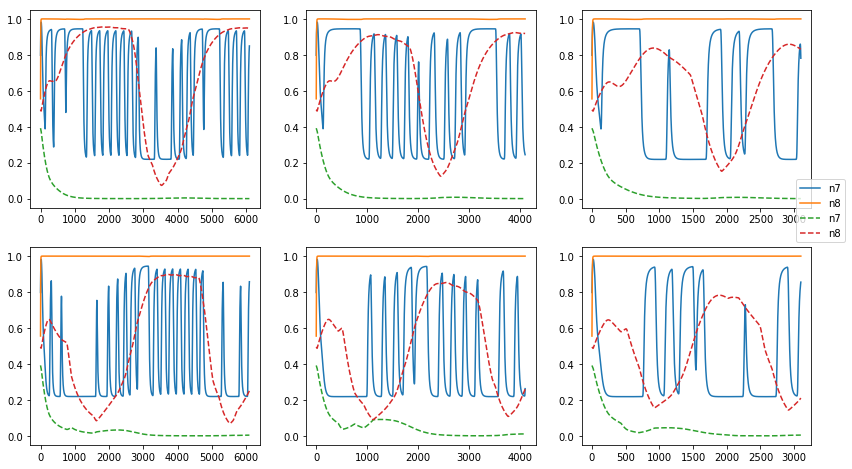

In [71]:
plot_motor_outputs(td)

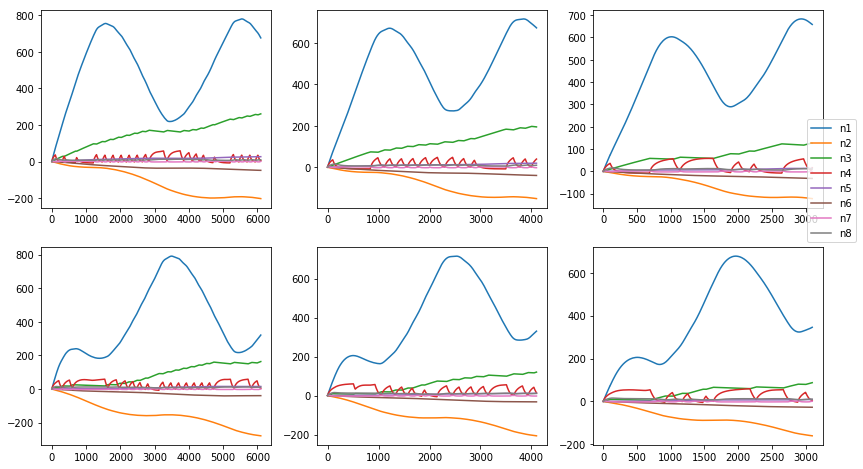

In [72]:
def plot_activation_all(trial_data, agent_num):
    k = 'brain_state_a' + str(agent_num)
    num_trials = len(trial_data['target_pos'])
    num_cols = num_trials/2
    fig = plt.figure(figsize=(14, 8))

    for p in range(num_trials):
        ax = fig.add_subplot(2, num_cols, p + 1)
        ax.plot(trial_data[k][p][:, 0], label='n1')
        ax.plot(trial_data[k][p][:, 1], label='n2')
        ax.plot(trial_data[k][p][:, 2], label='n3')
        ax.plot(trial_data[k][p][:, 3], label='n4')
        ax.plot(trial_data[k][p][:, 4], label='n5')
        ax.plot(trial_data[k][p][:, 5], label='n6')
        ax.plot(trial_data[k][p][:, 6], label='n7')
        ax.plot(trial_data[k][p][:, 7], label='n8')

    plt.legend(bbox_to_anchor=(1.04,1), loc="lower center")
    plt.show()
    
plot_activation_all(td, 1)

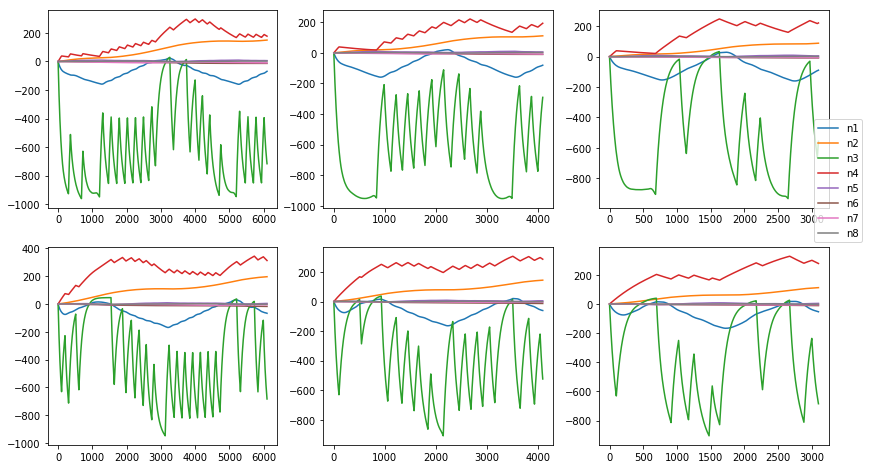

In [73]:
plot_activation_all(td, 2)